<a href="https://colab.research.google.com/github/jihanurulk/Titanic_dataset/blob/main/UTS%20TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1934]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1935]:
#Pemanggilan Data
data = pd.read_csv("Titanic-Dataset.csv")
data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

# Eksplorasi data

In [1936]:
#Melihat 5 data terakhir
data.tail(5)

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [1937]:
#Melihat statistika deskriptif
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [1938]:
#Melihat info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Berdasarkan output info data di atas, dapat diketahui bahwa jumlah total penumpang yaitu 891 penumpang.

In [1939]:
#Menghitung jumlah penumpang yang selamat dan tidak selamat
count_values = data['Survived'].value_counts()
count_values

Survived
0    549
1    342
Name: count, dtype: int64

In [1940]:
#Membuat tabel data penumpang yang selamat dan tidak selamat
tabel_survived = pd.DataFrame({'Status': ['Penumpang yang tidak selamat', 'Penumpang yang selamat'], 'Jumlah': count_values.values})
print(tabel_survived)

                         Status  Jumlah
0  Penumpang yang tidak selamat     549
1        Penumpang yang selamat     342


Dari output di atas, dapat diketahui bahwa jumlah penumpang yang selamat yaitu penumpang dan jumlah penumpang yang tidak selamat yaitu 549 penumpang.

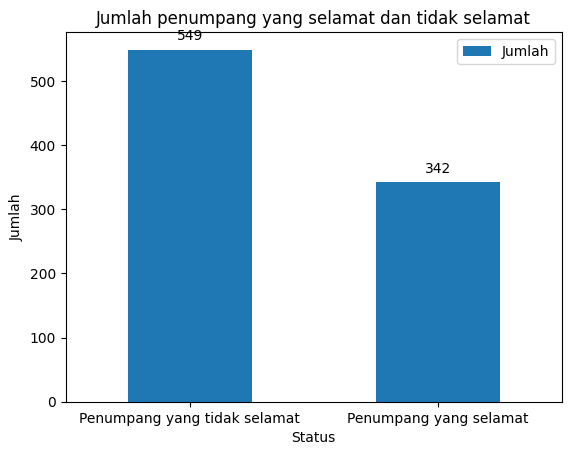

In [1941]:
#Membuat grafik jumlah penumpang yang selamat dan tidak selamat
sts = tabel_survived.plot(x='Status', y='Jumlah', kind='bar', rot=0)
plt.title('Jumlah penumpang yang selamat dan tidak selamat')
plt.xlabel('Status')
plt.ylabel('Jumlah')

# Menambahkan anotasi jumlah penumpang di setiap kotak
for p in sts.patches:
    sts.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

In [1942]:
#Menghitung rata-rata umur penumpang
ratarata_age = data['Age'].mean()
print(f"Rata-rata umur penumpang yaitu {ratarata_age} tahun.")

Rata-rata umur penumpang yaitu 29.69911764705882 tahun.


In [1943]:
#Mencari penumpang termuda
passenger_termuda = data.loc[data['Age'].idxmin()]
umur_termuda = passenger_termuda['Age']
nama_passengertermuda = passenger_termuda['Name']
print(f"Penumpang termuda yaitu {nama_passengertermuda} dengan usia {umur_termuda} tahun.")

Penumpang termuda yaitu Thomas, Master. Assad Alexander dengan usia 0.42 tahun.


In [1944]:
#Mencari penumpang tertua
penumpang_tertua = data.loc[data['Age'].idxmax()]
umur_tertua = penumpang_tertua['Age']
nama_penumpangtertua = penumpang_tertua['Name']
print(f"Penumpang tertua yaitu {nama_penumpangtertua} dengan usia {umur_tertua} tahun.")

Penumpang tertua yaitu Barkworth, Mr. Algernon Henry Wilson dengan usia 80.0 tahun.


In [1945]:
#Menghitung jumlah penumpang berdasarkan jenis kelamin
jumlah_jk = data['Sex'].value_counts()
jumlah_jk

Sex
male      577
female    314
Name: count, dtype: int64

Jumlah penumpang laki-laki yaitu 577 penumpang dan jumlah penumpang perempuan yaitu 314 penumpang.

In [1946]:
#Membuat tabel data penumpang berdasarkan jenis kelamin
tabel_sex = pd.DataFrame({'Jenis kelamin': ['Laki-laki', 'Perempuan'], 'Jumlah': jumlah_jk.values})
print(tabel_sex)

  Jenis kelamin  Jumlah
0     Laki-laki     577
1     Perempuan     314


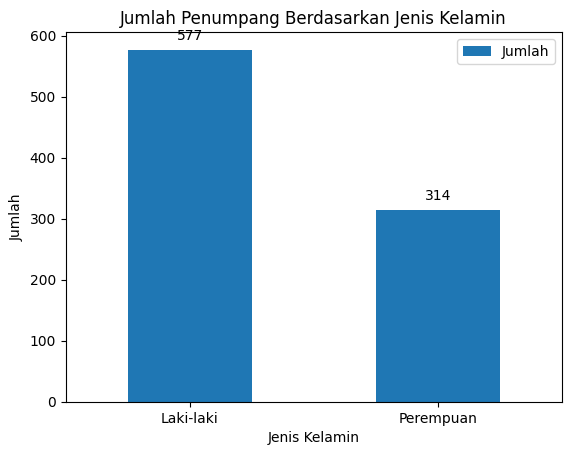


Penumpang terbanyak adalah male dengan jumlah 577 penumpang.


<ipython-input-1947-764132262480>:16: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"\nPenumpang terbanyak adalah {terbanyak_jk} dengan jumlah {jumlah_jk[0]} penumpang.")


In [1947]:
#Membuat grafik batang
jk = tabel_sex.plot(x='Jenis kelamin', y='Jumlah', kind='bar', rot=0)
plt.title('Jumlah Penumpang Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')

#Menambahkan anotasi jumlah penumpang di setiap kotak
for p in jk.patches:
    jk.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

#Mentukan penumpang terbanyak berdasarkan jenis kelamin
jumlah_jk = data['Sex'].value_counts()
terbanyak_jk = jumlah_jk.index[0]
print(f"\nPenumpang terbanyak adalah {terbanyak_jk} dengan jumlah {jumlah_jk[0]} penumpang.")

Berdasarkan output di atas, penumpang terbanyak adalah penumpang yang berjenis kelamin laki-laki dengan jumlah 577 penumpang.

In [1948]:
# Menghitung jumlah penumpang berdasarkan kelas (Pclass)
jumlah_penumpang_per_kelas = data['Pclass'].value_counts()

# Membuat tabel data penumpang berdasarkan kelas
tabel_kelas = pd.DataFrame({'Kelas': jumlah_penumpang_per_kelas.index, 'Jumlah': jumlah_penumpang_per_kelas.values})
print("Jumlah penumpang berdasarkan kelas:\n", tabel_kelas)

# Menghitung persentase penumpang di kelas 1
total_penumpang = len(data)
jumlah_penumpang_kelas_1 = len(data[data['Pclass'] == 1])
persentase_kelas_1 = (jumlah_penumpang_kelas_1 / total_penumpang) * 100

print("\nPersentase penumpang di kelas 1: {:.2f}%".format(persentase_kelas_1))

Jumlah penumpang berdasarkan kelas:
    Kelas  Jumlah
0      3     491
1      1     216
2      2     184

Persentase penumpang di kelas 1: 24.24%


# *PREPROCESSING* DATA

In [1949]:
#Melihat korelasi setiap variabel dengan Survived
import seaborn as sns
import pandas as pd
# Memilih data numerik untuk analisis korelasi
numerical_data = data.select_dtypes(include=['number'])

# Menghitung korelasi antara setiap variabel dengan 'Survived'
correlation_dengan_survived = numerical_data.corr()['Survived'].sort_values(ascending=False)

# Menampilkan korelasi setiap variabel dengan 'Survived'
print(correlation_dengan_survived)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64


In [1950]:
#Melihat missing value pada data
data.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [1951]:
#Menghitung missing value pada data
np.sum(data.isnull())

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1952]:
#Mengetahui jumlah missing value di seluruh dataset
data.isnull().sum().sum()

np.int64(866)

Berdasarkan output *summarize* tersebut, dapat dilihat bahwa ada *missing values* pada data dengan total 866 *missing value.*

Diperoleh bahwa kolom yang mengandung *missing values* (blanks/ N/A (Python : nan atau NaN)) adalah kolom Age dengan 177 *missing value*, kolom Cabin dengan 687 *missing value*, dan kolom Embarked dengan 2 *missing value*.

Setelah mengetahui adanya missing value pada kolom Age, kolom Cabin, dan kolom Embarked, selanjutnya akan dilakukan penanganan *missing value* tersebut.

#Penanganan missing value pada kolom Age

In [1953]:
#Melihat isi dalam kolom Age
data['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [1954]:
#Melihat jumlah missing value pada kolom Age
np.sum(data['Age'].isnull())

np.int64(177)

In [1955]:
import scipy.stats as stats
# Uji normalitas Kolmogorov-Smirnov untuk kolom Age
statistic, p_value = stats.kstest(data['Age'], 'norm')

print(f"Uji normalitas Kolmogorov-Smirnov untuk kolom '{'Age'}':")
print(f"Statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretasi hasil uji Kolmogorov-Smirnov
alpha = 0.05  # Tingkat signifikansi
if p_value > alpha:
    print(f"Oleh karena P-value= {p_value} > 0.05, maka data pada kolom '{'Age'}' berdistribusi normal (terima H0).")
else:
    print(f"Oleh karena P-value= {p_value} < 0.05, maka data pada kolom '{'Age'}' tidak berdistribusi normal (tolak H0).")

Uji normalitas Kolmogorov-Smirnov untuk kolom 'Age':
Statistic: nan
P-value: nan
Oleh karena P-value= nan < 0.05, maka data pada kolom 'Age' tidak berdistribusi normal (tolak H0).


Oleh karena data Age tidak berdistribusi normal, maka untuk mengisi missing value akan digunakan metode median.

In [1956]:
#Mengisi missing value pada kolom Age
data['Age']=data['Age'].fillna(data['Age'].median())

In [1957]:
#Melihat jumlah missing value pada kolom Age
np.sum(data['Age'].isnull())

np.int64(0)

Setelah dilakukan pengisian *missing value*, sehingga sudah tidak ada lagi *missing value* pada kolom Age.

# Penanganan missing value pada kolom Cabin

In [1958]:
#Melihat isi dalam kolom Cabin
data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [1959]:
#Melihat jumlah missing value pada kolom Cabin
np.sum(data['Cabin'].isnull())

np.int64(687)

Jumlah *missing value* pada Data Cabin yaitu 687 *missing value*dari total 891 data, atau 77,1% data hilang. Oleh karena itu, tidak dilakukan pengisian *missing value*. Karena, jika tetap dilakukan pengisian *missing value* menggunakan mean, median, atau modus dapat menyebabkan bias data secara signifikan. Sehingga data tersebut tidak akan digunakan.

In [1960]:
#Menghapus kolom 'Cabin'
data = data.drop('Cabin', axis=1)

# Penanganan missing value pada kolom Embarked

In [1961]:
#Melihat isi dalam kolom Embarked
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [1962]:
#Melihat jumlah missing value pada kolom Embarked
np.sum(data['Embarked'].isnull())

np.int64(2)

Jumlah *missing value* pada kolom Embarked yaitu 2 *missing value*. Karena jumlahnya sedikit, kita bisa mengisinya dengan nilai yang paling sering muncul (modus) pada kolom tersebut.

In [1963]:
#Mengisi missing value pada kolom Embarked
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [1964]:
#Melihat jumlah missing value pada kolom Embarked
np.sum(data['Embarked'].isnull())

np.int64(0)

# Deteksi dan penanganan outlier pada dataset

1. Boxplot

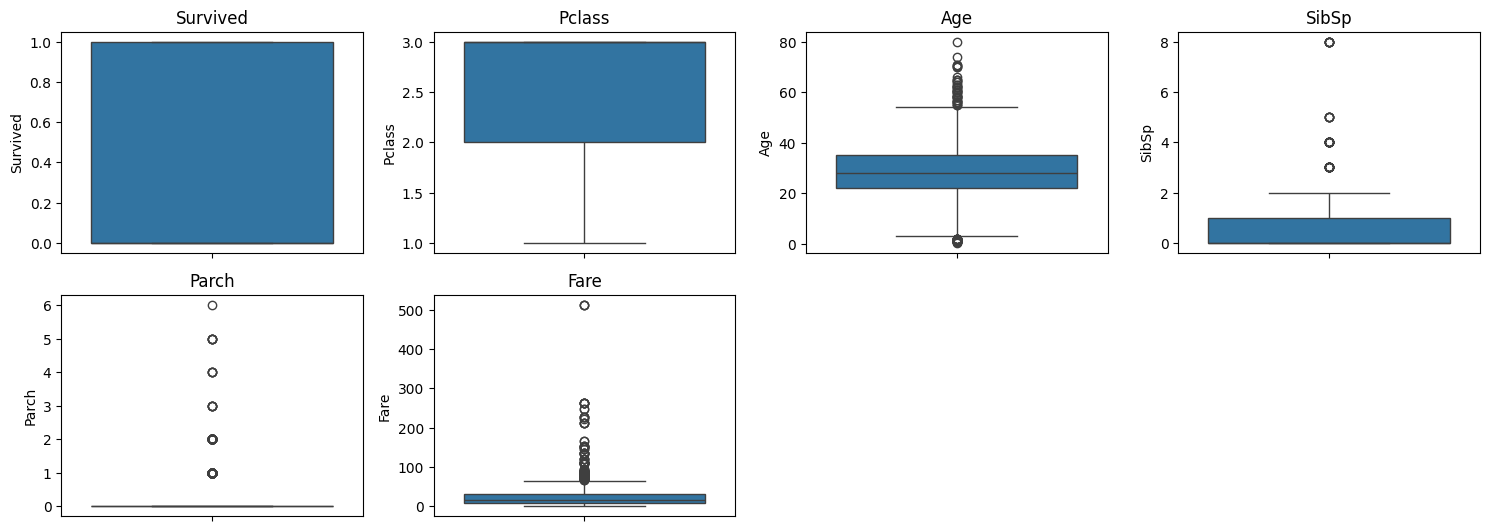

In [1965]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik yang ingin dicek outliernya
num_cols = ['Survived', 'Pclass','Age','SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

2. IQR

In [1966]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Cek outlier pada kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    num_outliers = len(outliers)
    print(f"{col}: {num_outliers} outliers")
    if num_outliers > 0:
        print(f"Nilai outlier di '{col}':\n{outliers[col].unique()}\n") #prints nilai outlier

Survived: 0 outliers
Pclass: 0 outliers
Age: 66 outliers
Nilai outlier di 'Age':
[ 2.   58.   55.   66.   65.    0.83 59.   71.   70.5  55.5   1.   61.
 56.   62.   63.    0.92 60.   64.    0.75 57.   80.   70.    0.67  0.42
 74.  ]

SibSp: 46 outliers
Nilai outlier di 'SibSp':
[3 4 5 8]

Parch: 213 outliers
Nilai outlier di 'Parch':
[1 2 5 3 4 6]

Fare: 116 outliers
Nilai outlier di 'Fare':
[ 71.2833 263.     146.5208  82.1708  76.7292  80.      83.475   73.5
  77.2875 247.5208  79.2     66.6     69.55   113.275   76.2917  90.
  86.5    512.3292  79.65   153.4625 135.6333  77.9583  78.85    91.0792
 151.55   110.8833 108.9     83.1583 262.375  164.8667 134.5    133.65
  75.25    69.3    211.5    227.525  120.      81.8583  89.1042  78.2667
  93.5    221.7792 106.425   71.     211.3375]



Berdasarkan output pengecekan outlier menggunakan IQR, dapat dilihat bahwa terdapat outlier pada dataset.

Outlier adalah nilai yang jauh berbeda dari nilai lainnya dalam kumpulan data.

Terdapat 66 outlier pada kolom Age, 46 outlier pada data SibSp, 213 outlier pada kolom Parch, dan 116 outlier pada data Fare.

Outlier pada data ini perlu diatasi. Penanganan outlier dapat dilakukan dengan winosirizing (mengganti outlier dengan batas IQR) atau dengan menghapus outlier jika jumlah outlier sangat sedikit dan tidak mempengaruhi distribusi data.

Winsorizing (Mengganti Outlier dengan Batas IQR)

In [1967]:
def winsorize_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data[column] = np.where(data[column] < lower_bound, lower_bound, data[column])
    data[column] = np.where(data[column] > upper_bound, upper_bound, data[column])

# Terapkan Winsorizing
for col in num_cols:
    winsorize_iqr(data, col)

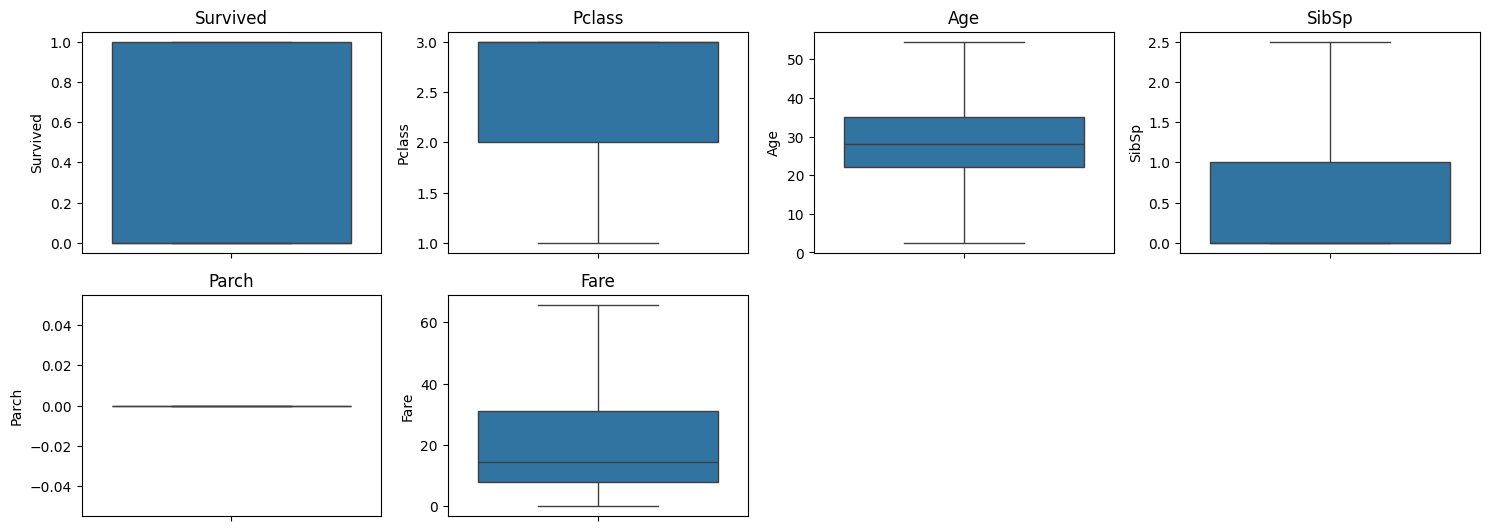

In [1968]:
#cek boxplot lagi

num_cols = ['Survived', 'Pclass','Age','SibSp', 'Parch', 'Fare']

# Visualisasi Boxplot
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [1969]:
# Cek jumlah outlier lagi pada kolom numerik
for col in num_cols:
    outliers = detect_outliers_iqr(data, col)
    num_outliers = len(outliers)
    print(f"{col}: {num_outliers} outliers")
    if num_outliers > 0:
        print(f"Nilai outlier di '{col}':\n{outliers[col].unique()}\n") #prints nilai outlier

Survived: 0 outliers
Pclass: 0 outliers
Age: 0 outliers
SibSp: 0 outliers
Parch: 0 outliers
Fare: 0 outliers


Setelah dilakukan winosirizing, sudah tidak ada lagi outlier pada dataset.

# Encoding data kategorik

In [1970]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    float64
 7   Parch        891 non-null    float64
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 76.7+ KB


Encoding pada kolom Sex dan Embarked menggunakan One-Hot Encoding (OHE), karena kolom tersebut jumlah kategorinya tidak terlalu banyak (menghindari dimensionalitas tinggi). OHE dapat engubah kategori menjadi beberapa kolom biner (0/1) yang akan menambah dimensi kolom data.

In [1971]:
#One-Hot Encoding pada kolom Sex
data = pd.get_dummies(data, columns=['Sex'], prefix='Sex')

In [1972]:
#One-Hot Encoding pada kolom Embarked
data = pd.get_dummies(data, columns=['Embarked'], prefix='Embarked')

In [1973]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       891 non-null    float64
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    float64
 6   Parch        891 non-null    float64
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_female   891 non-null    bool   
 10  Sex_male     891 non-null    bool   
 11  Embarked_C   891 non-null    bool   
 12  Embarked_Q   891 non-null    bool   
 13  Embarked_S   891 non-null    bool   
dtypes: bool(5), float64(6), int64(1), object(2)
memory usage: 67.1+ KB


# Scalling data

Scalling data diperlukan untuk beberapa algoritma klasifikasi. Seperti KNN membutuhkan scalling, karena KNN sangat sensitif terhadap skala jarak. Jadi dengan adanya scalling data akan membukat semua fitur memiliki skala yang sama dan dapat meningkatkan performa KNN.

In [1974]:
from sklearn.preprocessing import MinMaxScaler

X_train = MinMaxScaler().fit_transform(X_train)
X_test = MinMaxScaler().fit_transform(X_test)

print(X_train)

[[0.15748031 1.         0.49038462 ... 1.         0.         0.        ]
 [0.49381327 0.5        0.54807692 ... 0.         0.         1.        ]
 [0.91901012 0.5        0.54807692 ... 1.         0.         0.        ]
 ...
 [0.70753656 1.         0.49038462 ... 0.         1.         0.        ]
 [0.6287964  1.         0.64423077 ... 0.         0.         1.        ]
 [0.76940382 0.5        1.         ... 0.         0.         1.        ]]


MinMaxScaler adalah salah satu metode dalam Scikit-Learn yang digunakan untuk melakukan normalisasi atau penyekalaan fitur-fitur pada rentang nilai tertentu, biasanya antara 0 dan 1.

# Pembagian data training dan data testing

Dalam analisis klasifikasi, pemisahan data menjadi data X dan data y adalah langkah penting dalam persiapan data. Ini dilakukan untuk memisahkan variabel independen (fitur) dari variabel dependen (Survived) dalam dataset.

Data X (Fitur/Features): Merupakan kumpulan data yang terdiri dari variabel-variabel independen atau fitur-fitur. Fitur-fitur ini adalah atribut-atribut atau informasi-informasi yang digunakan oleh model untuk melakukan prediksi atau klasifikasi.

Data y (Outcome/Labels): Merupakan variabel dependen yang ingin diprediksi oleh model. Ini berisi label atau kelas yang ingin diidentifikasi atau diprediksi berdasarkan fitur-fitur yang ada dalam data X.

Pemisahan ini penting karena:

Melatih Model: Data X digunakan untuk melatih model. Model belajar dari pola-pola yang ada di dalam data X untuk dapat memprediksi atau mengklasifikasikan data dengan tepat.

Validasi dan Evaluasi: Data y (Survived) dibutuhkan untuk menguji seberapa baik model yang sudah dilatih mampu melakukan prediksi. Dengan memisahkan target dari fitur-fitur, kita dapat mengevaluasi seberapa baik model dapat memprediksi label yang benar untuk data baru yang belum pernah dilihat sebelumnya.

In [1975]:
# Memisahkan data menjadi variabel X dan y
X = data.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = data['Survived']


Data training adalah bagian dari dataset yang digunakan untuk melatih model dalam pembelajaran mesin. Data ini digunakan untuk mempelajari pola dan hubungan antara fitur (variabel independen) dan label atau target yang diinginkan (variabel dependen). Model belajar dari data training untuk mengidentifikasi pola-pola yang ada dan menyesuaikan parameter-parameter internalnya agar dapat membuat prediksi yang akurat pada data baru.

Sementara itu, data testing (atau data uji) merupakan bagian dari dataset yang digunakan untuk menguji kinerja model yang telah dilatih dengan data training. Data ini tidak digunakan dalam proses pelatihan dan digunakan untuk mengevaluasi seberapa baik model mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya. Data testing membantu mengukur seberapa baik model mampu memprediksi label atau output yang benar untuk data yang tidak pernah dilihat sebelumnya, membantu memastikan bahwa model tidak hanya mengingat data yang telah dilatih tapi juga mampu mengadopsi pola umum yang ditemui pada data baru.


Besarnya pembagian data:

Pemisahan data training dan testing adalah keputusan yang penting dalam pembuatan model yang dapat diandalkan. Secara umum, tidak ada aturan tertentu tentang seberapa besar persentase data yang harus dialokasikan untuk training dan testing, namun ada yang dapat dipertimbangkan:

Pemisahan Standar: Pembagian yang sering digunakan adalah 70-30 atau 80-20, di mana sekitar 70% atau 80% dari data digunakan untuk training dan sisa 30% atau 20% digunakan untuk testing. Ini bisa menjadi awal yang baik untuk banyak kasus.

Data yang Lebih Besar: Jika datasetnya besar, pemisahan seperti 90-10 atau bahkan 95-5 mungkin dapat dilakukan. Model dengan lebih banyak data training cenderung memiliki kinerja yang lebih baik, tetapi harus diingat bahwa kita ingin memiliki cukup data di testing untuk evaluasi yang akurat.


Proses Pembagian Data:

Mengacak data:

Hal ini penting untuk memastikan bahwa data training dan testing merepresentasikan keseluruhan dataset secara acak dan menghindari bias yang mungkin ada dalam urutan data asli.

Tentukan Proporsi:

Tentukan proporsi data yang akan digunakan untuk training dan testing. Proporsi yang umum digunakan adalah 80:20 atau 70:30, yang berarti 80% atau 70% data digunakan untuk training dan sisanya 20% atau 30% untuk testing.

Bagi Data:

Bagi dataset menjadi dua subset, yaitu data training dan data testing, sesuai dengan proporsi yang telah ditentukan sebelumnya

In [1976]:
from sklearn.model_selection import train_test_split
# Membagi data menjadi training set dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.model_selection import train_test_split: Ini adalah baris yang mengimpor fungsi train_test_split dari pustaka Scikit-Learn. Fungsi ini memungkinkan untuk dengan mudah membagi dataset menjadi bagian training dan testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0): Ini adalah pemanggilan fungsi train_test_split. Parameter yang digunakan adalah sebagai berikut:

X: Merupakan variabel yang berisi fitur atau atribut-atribut dari dataset.(ingat X besar)
y: Merupakan variabel yang berisi target atau label dari dataset. (ingat y kecil)
test_size=0.2: Parameter ini menentukan proporsi dari dataset yang akan dialokasikan untuk testing. Dalam contoh ini, 0.2 berarti 20% dari data akan menjadi data testing.
random_state=0: Parameter ini menentukan seed atau nilai awal untuk generator angka acak yang digunakan dalam pembagian data. Ini berguna untuk memastikan bahwa pembagian data ini dapat direproduksi secara konsisten. Jika nilai ini tetap, pembagian data akan sama setiap kali kode ini dijalankan.


Hasil dari fungsi train_test_split adalah empat keluaran:

X_train: Data training untuk fitur-fitur.
X_test: Data testing untuk fitur-fitur.
y_train: Data training untuk target atau label.
y_test: Data testing untuk target atau label.
Dengan memisahkan dataset menjadi empat bagian ini, X_train dan y_train digunakan untuk melatih model, sementara X_test dan y_test digunakan untuk menguji performa model yang telah dilatih. Ini membantu dalam mengevaluasi seberapa baik model yang dihasilkan mampu menggeneralisasi pada data baru yang belum pernah dilihat sebelumnya.

Alasan Pembagian Data:

Evaluasi Model:

Tujuan utama membagi data adalah untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Dengan melatih model pada data training dan mengujinya pada data testing, kita dapat mengukur seberapa baik model dapat menggeneralisasi ke data baru.

Mencegah *Overfitting*:

*Overfitting* terjadi ketika model terlalu kompleks dan "menghafal" data training, sehingga performa pada data baru buruk. Data testing membantu mendeteksi *overfitting* dan memastikan model tidak hanya menghafal pola di data training.

Memilih Model Terbaik:

Dengan membandingkan performa model yang berbeda pada data testing, kita dapat memilih model yang paling cocok untuk dataset dan tugas yang diberikan.

Simulasi Data Real:

Data testing berperan sebagai simulasi data real yang belum pernah dilihat oleh model. Dengan menguji model pada data ini, kita dapat memperkirakan bagaimana model akan berfungsi di dunia nyata.

Pada dataset ini menggunakan proporsi 80:20, karena dataset Titanic relatif kecil. Sehingga penting untuk memaksimalkan jumlah data yang digunakan untuk melatih model agar model dapat belajar pola yang cukup dari data. Proporsi 80% untuk training memastikan model memiliki cukup data untuk belajar dengan baik.

Selanjutnya, meskipun model yang digunakan untuk memprediksi survival pada dataset Titanic bisa bervariasi dalam kompleksitas, umumnya model yang digunakan tidak terlalu kompleks. Model yang lebih sederhana cenderung tidak memerlukan data training yang sangat banyak untuk mencapai performa yang baik.

Tujuan utama dari modeling dengan dataset Titanic adalah untuk membuat model yang dapat menggeneralisasi dengan baik ke data baru (penumpang yang tidak ada di dataset). Proporsi 20% untuk testing memberikan data yang cukup untuk mengevaluasi kemampuan generalisasi model dan mendeteksi *overfitting*.

Dataset Titanic cukup seimbang dalam hal target variabel (survival), dengan jumlah penumpang yang selamat dan tidak selamat yang relatif seimbang. Proporsi 80:20 membantu menjaga keseimbangan ini dalam data training dan testing, sehingga model tidak bias terhadap salah satu kelas.

# Klasifikasi

In [1977]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [1978]:
y_pred = classifier.predict(X_test)

In [1979]:
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

Actual  Predicted
495     0.0        0.0
648     0.0        0.0
278     0.0        1.0
31      1.0        1.0
255     1.0        0.0
..      ...        ...
780     1.0        1.0
837     0.0        0.0
215     1.0        1.0
833     0.0        0.0
372     0.0        0.0

[179 rows x 2 columns]

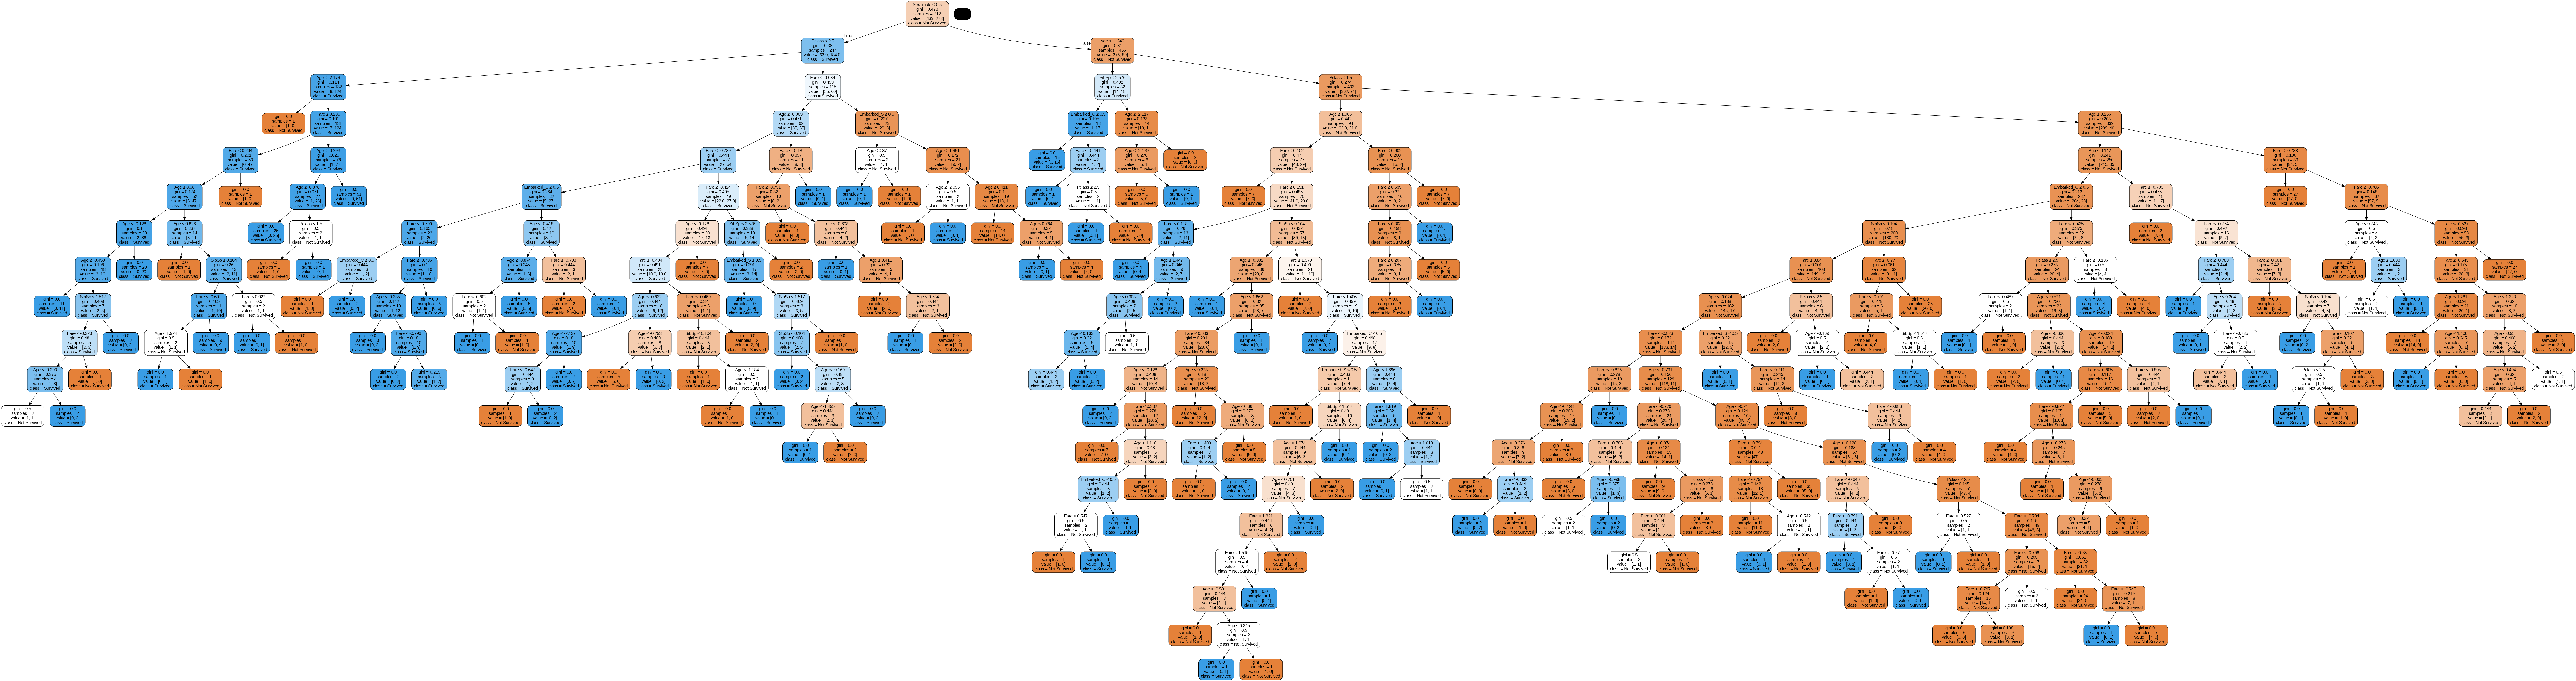

In [1980]:
import pydotplus
X.columns = ['Survived','Passengerid','Name','Pclass','Sex', 'Age', 'SibSp', 'Parch','Fare','Ticket','Embarked']
y.columns = ['Not Survived', 'Survived']  # Mendefinisikan secara eksplisit

#Ekspor menjadi file dot
from sklearn.tree import export_graphviz
export_graphviz(classifier, out_file='tree.dot',
                feature_names = X.columns,
                class_names = y.columns,
                rounded = True, proportion = False,
                precision = 2, filled = True)

#Membuat grafik dari  dot data
graph = pydotplus.graph_from_dot_data(dot_data)

#Tampilkan grafik
Image(graph.create_png())

In [1981]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

from sklearn.naive_bayes import GaussianNB digunakan untuk mengimpor kelas GaussianNB dari library sklearn.naive_bayes. Kelas ini digunakan untuk membuat model Naive Bayes dengan asumsi distribusi Gaussian (normal) pada fitur-fitur numerik.


nb = GaussianNB(): Membuat objek nb dari kelas GaussianNB. Objek ini akan menjadi model Naive Bayes yang akan digunakan.

In [1982]:
# fit train set memakai Gaussian Naive Bayes
nb.fit(X_train, y_train)

GaussianNB()

nb.fit(X_train, y_train) digunakan untuk melatih model Naive Bayes menggunakan data pelatihan X_train (fitur) dan y_train (target). Proses ini akan mempelajari pola dari data pelatihan untuk digunakan dalam prediksi. Model akan menghitung probabilitas prior dan likelihood dari data training.

In [1983]:
classif_name = ['NB']
y_predict = {}
y_predict['NB'] = nb.predict(X_test)

y_pred_nb = nb.predict(X_test) menggunakan model Naive Bayes yang telah dilatih (nb) untuk membuat prediksi pada data uji X_test. Hasil prediksi disimpan dalam variabel y_pred_nb. Model akan menghitung probabilitas posterior untuk setiap kelas dan memilih kelas dengan probabilitas tertinggi sebagai prediksi.

Naive Bayes bekerja berdasarkan teorema Bayes yang menghitung probabilitas suatu kejadian berdasarkan pengetahuan sebelumnya. Dalam konteks klasifikasi, teorema Bayes digunakan untuk menghitung probabilitas suatu data termasuk dalam kelas tertentu, berdasarkan fitur-fitur yang dimiliki data tersebut.

Asumsi Naive Bayes:

Naive Bayes membuat asumsi bahwa fitur-fitur data independen satu sama lain. Asumsi ini disebut "naive" karena dalam kenyataannya fitur-fitur data seringkali saling berhubungan. Meskipun asumsi ini sederhana, Naive Bayes seringkali memberikan hasil yang baik dalam praktiknya.

In [1984]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  #Jumlah tetangga (k), dapat disesuaikan
knn.fit(X_train, y_train)

KNeighborsClassifier()

from sklearn.neighbors import
KNeighborsClassifier: Mengimpor kelas KNeighborsClassifier dari library sklearn.neighbors. Kelas ini digunakan untuk membuat model KNN.

knn = KNeighborsClassifier(n_neighbors=5): Membuat objek knn dari kelas KNeighborsClassifier dengan parameter n_neighbors=5. Parameter ini menentukan jumlah tetangga terdekat (k) yang akan dipertimbangkan dalam proses klasifikasi.Nilai k menyesuaikan sesuai kebutuhan.

knn.fit(X_train, y_train): Melatih model KNN menggunakan data pelatihan X_train (fitur) dan y_train (target). Proses ini akan mempelajari pola dari data pelatihan untuk digunakan dalam prediksi.

In [1985]:
#Membuat prediksi
y_pred = knn.predict(X_test)

y_pred = knn.predict(X_test): Menggunakan model KNN yang telah dilatih (knn) untuk membuat prediksi pada data uji X_test. Hasil prediksi disimpan dalam variabel y_pred.

# Nilai evaluasi dan hasil analisis nilai evaluasi dari tiga algoritma klasifikasi


Evaluation Metrics for Decision Tree:
Accuracy: 0.7653631284916201
Precision: 0.7142857142857143
Recall: 0.6521739130434783
F1-score: 0.6818181818181818
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       110
         1.0       0.71      0.65      0.68        69

    accuracy                           0.77       179
   macro avg       0.75      0.74      0.75       179
weighted avg       0.76      0.77      0.76       179

Confusion Matrix:
[[92 18]
 [24 45]]

Evaluation Metrics for Naive Bayes:
Accuracy: 0.7932960893854749
Precision: 0.7051282051282052
Recall: 0.7971014492753623
F1-score: 0.7482993197278912
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       110
         1.0       0.71      0.80      0.75        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg

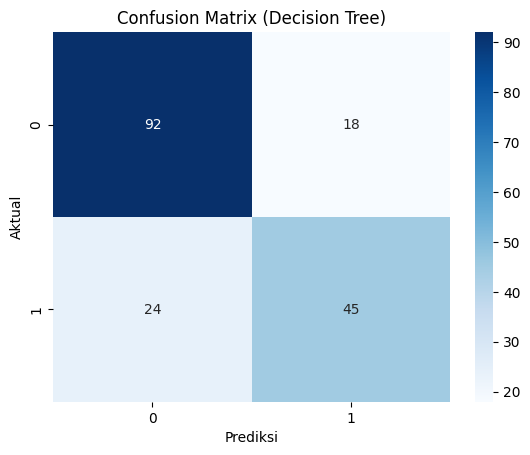

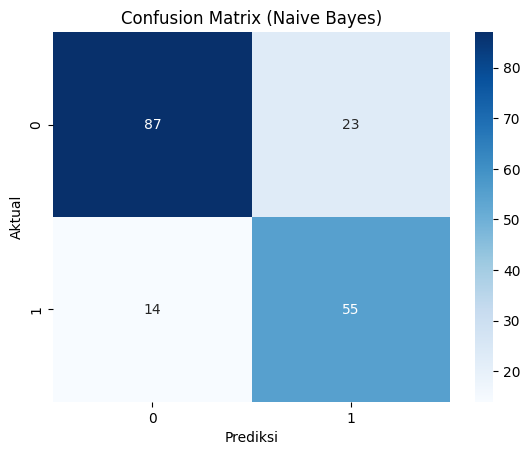

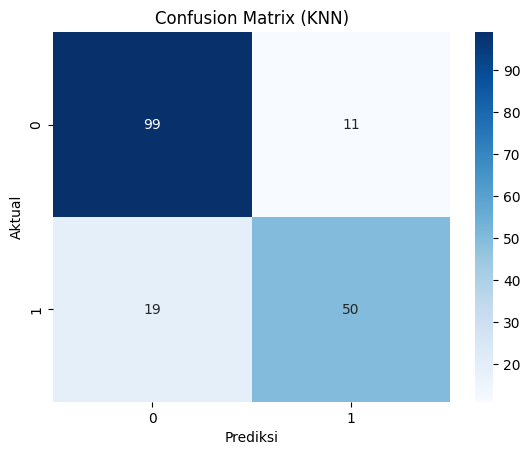

In [1986]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

#Menghitung confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_knn = confusion_matrix(y_test, y_pred_knn)

#Nilai evaluasi model Decision Tree, Naive Bayes, dan KNN
models = ['Decision Tree','Naive Bayes', 'KNN']
predictions = [y_pred_dt, y_pred_nb, y_pred_knn]
("Aktual")

for model_name, y_pred in zip(models, predictions):
    print(f"\nEvaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1-score: {f1_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")

sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Decision Tree)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (KNN)")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


1. Accuracy (Akurasi):

Definisi: Mengukur proporsi prediksi yang benar dari total prediksi.

Rumus: (Jumlah prediksi benar) / (Total jumlah prediksi)

Interpretasi: Seberapa sering model membuat prediksi yang benar secara keseluruhan. Nilai yang lebih tinggi menunjukkan model yang lebih akurat. Namun, akurasi bisa menyesatkan jika data tidak seimbang (jumlah data per kelas berbeda jauh).

2. Precision (Presisi):

Definisi: Mengukur proporsi prediksi positif yang benar dari total prediksi positif.

Rumus: (Jumlah prediksi positif benar) / (Jumlah prediksi positif benar + Jumlah prediksi positif salah)

Interpretasi: Dari semua yang diprediksi positif oleh model, berapa banyak yang benar-benar positif. Presisi tinggi berarti model jarang memberikan false positive (memprediksi positif padahal negatif).
3. Recall (Sensitivitas):

Definisi: Mengukur proporsi prediksi positif yang benar dari total data yang sebenarnya positif.

Rumus: (Jumlah prediksi positif benar) / (Jumlah prediksi positif benar + Jumlah prediksi negatif salah)

Interpretasi: Dari semua yang sebenarnya positif, berapa banyak yang berhasil diprediksi positif oleh model. Recall tinggi berarti model jarang memberikan false negative (memprediksi negatif padahal positif).
4. F1-score:

Definisi: Rata-rata harmonik antara precision dan recall.

Rumus: 2 * (Precision * Recall) / (Precision + Recall)

Interpretasi: Memberikan keseimbangan antara precision dan recall. Berguna ketika data tidak seimbang atau ketika false positive dan false negative sama-sama penting.
5. Classification Report:

Definisi: Memberikan ringkasan precision, recall, dan F1-score untuk setiap kelas, serta akurasi keseluruhan.

Interpretasi: Membantu memahami performa model secara lebih detail untuk setiap kelas.
6. Confusion Matrix:

Definisi: Tabel yang menunjukkan jumlah prediksi benar dan salah untuk setiap kelas.

Interpretasi: Memberikan gambaran visual tentang jenis kesalahan yang dibuat oleh model. Diagonal utama menunjukkan prediksi yang benar, sedangkan elemen di luar diagonal menunjukkan prediksi yang salah.

Dari output nilai evaluasi, diperoleh nilai metrik dari masing-masing model sebagai berikut.
1.   Evaluasi matrik untuk Decision Tree:
     
     Accuracy: 0.7653631284916201

     Precision: 0.7142857142857143

     Recall: 0.6521739130434783

     F1-score: 0.6818181818181818

2.   Evaluasi matrik untuk Naive Bayes:
     
     Accuracy: 0.7932960893854749

     Precision: 0.7051282051282052

     Recall: 0.7971014492753623

     F1-score: 0.7482993197278912
3.   Evaluasi matrik untuk for KNN:

     Accuracy: 0.8324022346368715
     
     Precision: 0.819672131147541
     
     Recall: 0.7246376811594203
     
     F1-score: 0.7692307692307693

Analisis:

Akurasi (Accuracy): KNN memiliki akurasi tertinggi (83.24%), diikuti oleh Naive Bayes (79.33%), dan kemudian Decision Tree (76.53%).

Presisi (Precision): KNN juga memiliki presisi tertinggi (81.97%), diikuti oleh Decision Tree  (71.43%), dan kemudian Naive Bayes (70.51%).

Recall (Sensitivity): Naive Bayes memiliki recall tertinggi (79.71%), diikuti oleh KNN (72.46%) dan kemudian Naive Bayes (65.22%).

F1-score: KNN memiliki F1-score tertinggi (76.92%), diikuti oleh Naive Bayes (74.82%), dan kemudian Decision Tree (68.18%).

Naive Bayes memiliki nilai Recall (Sensitivity) tertinggi. Meskipun akurasi Naive Bayes sedikit lebih rendah, recall-nya jauh lebih tinggi daripada KNN. Recall yang tinggi berarti model lebih baik dalam mengidentifikasi kasus positif yang sebenarnya. Dalam konteks Titanic, hal ini berarti Naive Bayes lebih baik dalam memprediksi penumpang yang benar-benar selamat.

KNN mungkin lebih akurat secara keseluruhan, tetapi model ini melewatkan lebih banyak penumpang yang selamat (recall lebih rendah). Naive Bayes mungkin kurang akurat secara umum, tetapi ia lebih baik dalam mengidentifikasi penumpang yang selamat.

Dalam kasus dataset Titanic ini, Naive Bayes bisa dibilang model yang lebih baik, terutama jika prioritas dataset ini adalah meminimalkan false negative (memprediksi penumpang tidak selamat padahal sebenarnya selamat).

# Evaluasi Model

In [1987]:
# Tampilkan confusion matrix
print("Confusion Matrix (Naive Bayes):\n", cm_nb)

Confusion Matrix (Naive Bayes):
 [[87 23]
 [14 55]]


In [1988]:
#Melihat classification report Naive Bayes

("Aktual")
print(f"Classification Report Naive Bayes:\n{classification_report(y_test, y_pred_nb)}")

Classification Report Naive Bayes:
              precision    recall  f1-score   support

         0.0       0.86      0.79      0.82       110
         1.0       0.71      0.80      0.75        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.79       179
weighted avg       0.80      0.79      0.80       179



Nilai precision untuk predikasi penumpang yang selamat yaitu 71%. Artinya, dari semua penumpang yang diprediksi selamat oleh model Naive Bayes, sekitar 71% penumpang benar-benar selamat.
Nilai recall untuk prediksi penumpang yang selamat yaitu 80%. Artinya, dari semua penumpang yang sebenarnya selamat, model Naive Bayes berhasil mengidentifikasi sekitar 80% di antaranya.

Nilai support untuk prediksi penumpang selamat yaitu 69. Artinya jumlah penumpang yang yang diprediksi selamat yaitu 69 orang.

Recall untuk prediksi penumpang selamat yaitu 80%. Artinya, Naive Bayes berhasil mengidentifikasi 80% dari penumpang yang sebenarnya selamat. Sehingga, 69*80%=55.2, dibulatkan sehingga 55 penumpang. Jadi, 55 penumpang diantaranya yang benar-benar selamat.

